In [1]:
import time
import cv2
import numpy as np
import pyautogui
import torch
import mss
from ultralytics import YOLO
from datasets import load_dataset
from matplotlib import pyplot as plt

model = YOLO(r"best_thusfar.pt").to("cuda")

c:\Python\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def draw_boxes(image, pred):
    
    data = pred[0].boxes.data.detach().cpu()
    
    # Loop through each prediction
    for i in range(data.shape[0]):
        box_i_xyxy = data[i,:4]
        box_i_cf = data[i, 4]
        box_i_class = int(data[i, 5])
        
        x1, y1, x2, y2 = map(int, box_i_xyxy)
        # Draw the bounding box
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        
        # Create the label with class ID and confidence score
        label = f"Class: {box_i_class}, Conf: {box_i_cf*100:.2f}%"
        
        # Put the label above the bounding box
        
        if box_i_class in [0, 2]:
            cv2.putText(image, label, (x1, y2 + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        else:
            cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    return image

def display_image(image):
    # Convert the image from BGR (OpenCV default) to RGB for displaying in Jupyter Notebook
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Use matplotlib to display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide axes
    plt.show()
    
def adjust_gamma(image, gamma=1.0):
    inv_gamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** inv_gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

def monitor_screen(model, monitor_area=None, gamma = 1.0):
    
    # Define the region of the screen to capture
    if monitor_area is None:
        monitor_area = {'top': 100, 'left': 100, 'width': 800, 'height': 600}
    
    with mss.mss() as sct:
        while True:
            # Capture the screen
            sct_img = sct.grab(monitor_area)
            
            # Convert the captured image to a format suitable for OpenCV
            frame = np.array(sct_img)
            frame = cv2.cvtColor(frame, cv2.COLOR_BGRA2BGR)  # Convert BGRA to BGR
            # Adjust the gamma to fix brightness if needed
            if gamma != 1.0:
                frame = adjust_gamma(frame, gamma=gamma)
            
            # Perform object detection on the frame
            result = model(frame)
            
            # Draw bounding boxes on the frame
            frame_with_boxes = draw_boxes(frame, result)
            
            # Display the frame with bounding boxes
            cv2.imshow('YOLO Screen Monitoring', frame_with_boxes)
            
            # Press 'q' to quit
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    
    # Close all OpenCV windows
    cv2.destroyAllWindows()


0: 352x640 3 ts, 3 theads, 70.0ms
Speed: 3.0ms preprocess, 70.0ms inference, 65.4ms postprocess per image at shape (1, 3, 352, 640)


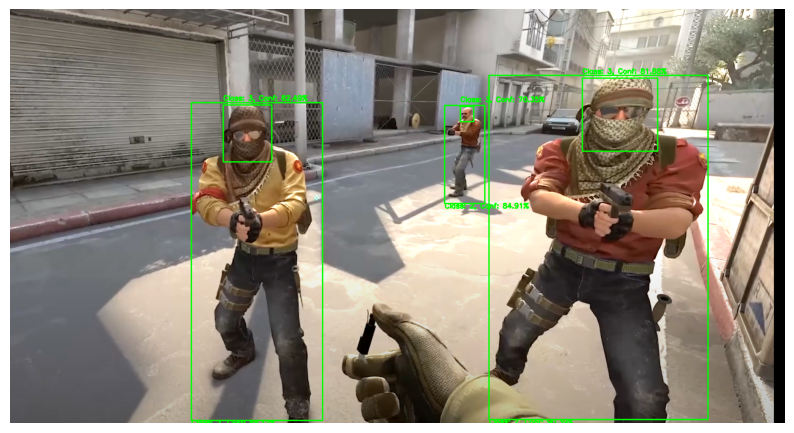

In [4]:
scale_factor = 1
test_path = r"yolotest.png"
img = cv2.imread(test_path)
img = cv2.resize(img,None, fx=scale_factor, fy=scale_factor)
result = model(img)
image_boxed = draw_boxes(img, result)
display_image(image_boxed)

In [5]:
# To continuously monitor a part of your computer screen

monitor_area = {'top': 100, 'left': 100, 'width': 800, 'height': 600}  # Adjust based on your screen

# TO QUIT, PRESS Q
monitor_screen(model, monitor_area=monitor_area, gamma = 1)

0: 480x640 (no detections), 78.0ms
Speed: 3.0ms preprocess, 78.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 t, 139.1ms
Speed: 3.0ms preprocess, 139.1ms inference, 5.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 t, 72.0ms
Speed: 4.0ms preprocess, 72.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 t, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 t, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 t, 20.0ms
Speed: 1.0ms preprocess, 20.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 t, 21.0ms
Speed: 1.0ms preprocess, 21.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 t, 23.0ms
Speed: 1.0ms preprocess, 23.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 t, 23